## 1. Load and Split Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("data.xlsx")
df.dropna(subset=['Credit_Score'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
x_columns = df.columns.tolist()
x_columns.remove('Credit_Score')
X = df[x_columns]
y = df['Credit_Score']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Distribution of Pristine Train Data

In [5]:
train = pd.concat([X_train, y_train], axis=1)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 5000.0)

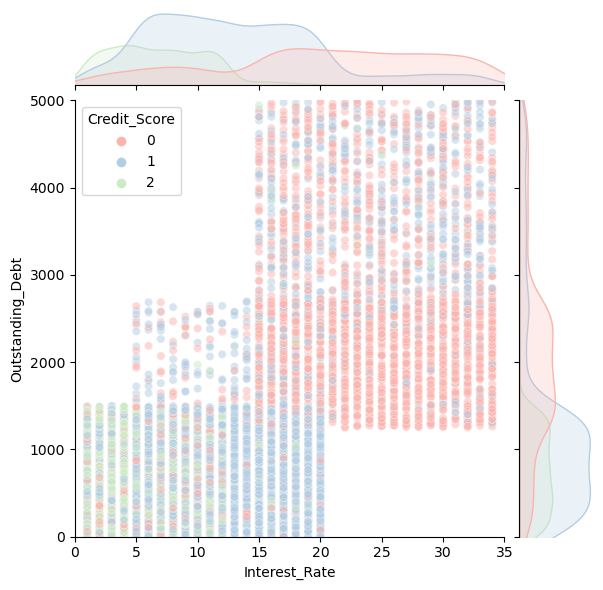

In [7]:
sns.jointplot(data=train, x="Interest_Rate", y="Outstanding_Debt", hue="Credit_Score", alpha=0.5, palette="Pastel1")
plt.xlim(0,35)
plt.ylim(0,5000)

## 3. Create Imbalanced Train Data Deliberately

In [8]:
train_0 = train[train['Credit_Score'] == 0]
train_1 = train[train['Credit_Score'] == 1]
train_2 = train[train['Credit_Score'] == 2]

In [9]:
train_0 = train_0.sample(frac=0.2)
train_2 = train_2.sample(frac=0.2)

In [10]:
train = pd.concat([train_0, train_1, train_2], axis=0)

(0.0, 5000.0)

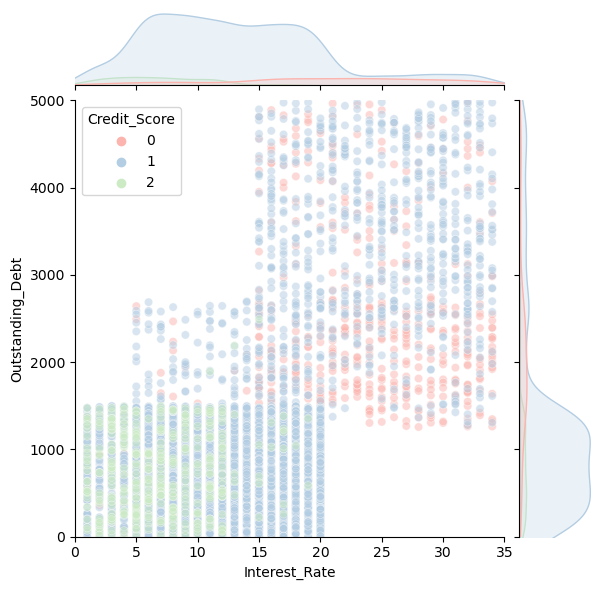

In [11]:
sns.jointplot(data=train, x="Interest_Rate", y="Outstanding_Debt", hue="Credit_Score", alpha=0.5, palette="Pastel1")
plt.xlim(0,35)
plt.ylim(0,5000)

In [12]:
x_columns = train.columns.tolist()
x_columns.remove('Credit_Score')
X_train = train[x_columns]
y_train = train['Credit_Score']

## 4. Define Data Transformer

In [13]:
from sklearn.preprocessing import LabelEncoder

class Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.mean_age = X["Age"].mean()
        self.occu_le = LabelEncoder() # create label-encoder
        encoded_occupation = pd.Series(self.occu_le.fit_transform(X["Occupation"])) # fit and transform occupation with label-encoder
        self.majority_occupation = encoded_occupation.mode()[0] # obtain majority occupation code
        self.mean_annual_income = X["Annual_Income"].mean()
        self.mean_monthly_inhand_salary = X["Monthly_Inhand_Salary"].mean()
        self.mean_num_bank_accounts = X["Num_Bank_Accounts"].mean()
        self.mean_num_creadit_card = X["Num_Credit_Card"].mean()
        self.mean_num_interest_rate = X['Interest_Rate'].mean()
        self.mean_num_of_loan = X['Num_of_Loan'].mean()
        self.mean_delay_from_due_date = X['Delay_from_due_date'].mean()
        self.mean_num_of_delayed_payment = X['Num_of_Delayed_Payment'].mean()
        self.mean_changed_credit_limit = X['Changed_Credit_Limit'].mean()
        self.mean_num_credit_inquiries = X['Num_Credit_Inquiries'].mean()
        self.cm_le = LabelEncoder() # create label-encoder
        encoded_credit_mix = pd.Series(self.cm_le.fit_transform(X["Credit_Mix"])) # fit and transform credit mix with label-encoder
        self.majority_credit_mix = encoded_credit_mix.mode()[0] # obtain majority credit mix code
        self.mean_outstanding_debt = X['Outstanding_Debt'].mean()
        self.mean_credit_history_age = X['Credit_History_Age'].mean()
        self.pma_le = LabelEncoder() # create label-encoder
        encoded_payment_of_min_amount = pd.Series(self.pma_le.fit_transform(X["Payment_of_Min_Amount"])) # fit and transform payment of min amount with label-encoder
        self.majority_payment_of_min_amount = encoded_payment_of_min_amount.mode()[0] # obtain majority payment of min amount
        self.mean_total_EMI_per_month = X['Total_EMI_per_month'].mean()
        self.mean_amount_invested_monthly = X['Amount_invested_monthly'].mean()
        self.pb_le = LabelEncoder() # create label-encoder
        encoded_payment_behaviour = pd.Series(self.pb_le.fit_transform(X["Payment_Behaviour"])) # fit and transform payment behaviour with label-encoder
        self.majority_payment_behaviour = encoded_payment_behaviour.mode()[0] # obtain majority payment behaviour
        self.mean_monthly_balance = X['Monthly_Balance'].mean()
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Age"] = X["Age"]
        new_df["Age"].fillna(self.mean_age,inplace=True)
        new_df["Occupation"] = self.occu_le.transform(X["Occupation"])
        new_df["Occupation"].fillna(self.majority_occupation,inplace=True)
        new_df["Annual_Income"] = X["Annual_Income"]
        new_df["Annual_Income"].fillna(self.mean_annual_income,inplace=True)
        new_df["Monthly_Inhand_Salary"] = X["Monthly_Inhand_Salary"]
        new_df["Monthly_Inhand_Salary"].fillna(self.mean_monthly_inhand_salary,inplace=True)
        new_df["Num_Bank_Accounts"] = X["Num_Bank_Accounts"]
        new_df["Num_Bank_Accounts"].fillna(self.mean_num_bank_accounts,inplace=True)
        new_df["Num_Credit_Card"] = X["Num_Credit_Card"]
        new_df["Num_Credit_Card"].fillna(self.mean_num_creadit_card,inplace=True)
        new_df["Interest_Rate"] = X["Interest_Rate"]
        new_df["Interest_Rate"].fillna(self.mean_num_interest_rate,inplace=True)
        new_df["Num_of_Loan"] = X["Num_of_Loan"]
        new_df["Num_of_Loan"].fillna(self.mean_num_of_loan,inplace=True)
        new_df["Delay_from_due_date"] = X["Delay_from_due_date"]
        new_df["Delay_from_due_date"].fillna(self.mean_delay_from_due_date,inplace=True)
        new_df["Num_of_Delayed_Payment"] = X["Num_of_Delayed_Payment"]
        new_df["Num_of_Delayed_Payment"].fillna(self.mean_num_of_delayed_payment,inplace=True)
        new_df["Changed_Credit_Limit"] = X["Changed_Credit_Limit"]
        new_df["Changed_Credit_Limit"].fillna(self.mean_changed_credit_limit,inplace=True)
        new_df["Num_Credit_Inquiries"] = X["Num_Credit_Inquiries"]
        new_df["Num_Credit_Inquiries"].fillna(self.mean_num_credit_inquiries,inplace=True)
        new_df["Credit_Mix"] = self.cm_le.transform(X["Credit_Mix"])
        new_df["Credit_Mix"].fillna(self.majority_credit_mix,inplace=True)
        new_df["Outstanding_Debt"] = X["Outstanding_Debt"]
        new_df["Outstanding_Debt"].fillna(self.mean_outstanding_debt,inplace=True)
        new_df["Credit_History_Age"] = X["Credit_History_Age"]
        new_df["Credit_History_Age"].fillna(self.mean_credit_history_age,inplace=True)
        new_df["Payment_of_Min_Amount"] = self.pma_le.transform(X["Payment_of_Min_Amount"])
        new_df["Payment_of_Min_Amount"].fillna(self.majority_payment_of_min_amount,inplace=True)
        new_df["Total_EMI_per_month"] = X["Total_EMI_per_month"]
        new_df["Total_EMI_per_month"].fillna(self.mean_total_EMI_per_month,inplace=True)
        new_df["Amount_invested_monthly"] = X["Amount_invested_monthly"]
        new_df["Amount_invested_monthly"].fillna(self.mean_amount_invested_monthly,inplace=True)
        new_df["Payment_Behaviour"] = self.pb_le.transform(X["Payment_Behaviour"])
        new_df["Payment_Behaviour"].fillna(self.majority_payment_behaviour,inplace=True)
        new_df["Monthly_Balance"] = X["Monthly_Balance"]
        new_df["Monthly_Balance"].fillna(self.mean_monthly_balance,inplace=True)
        return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

## 5. Train RandomForesfClassifier with the Imbalance Data

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier())]
model = Pipeline(steps)

In [16]:
model.fit(X_train, y_train)

Pipeline(steps=[('dtf',
                 <__main__.Data_Transformer object at 0x0000017EC806F5D0>),
                ('rfc', RandomForestClassifier())])

In [17]:
y_test_pred = model.predict(X_test)

In [18]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.55      0.69       822
           1       0.61      0.96      0.74      1217
           2       0.84      0.15      0.26       461

    accuracy                           0.67      2500
   macro avg       0.78      0.55      0.56      2500
weighted avg       0.75      0.67      0.63      2500



In [19]:
confusion_matrix(y_test,y_test_pred)

array([[ 452,  367,    3],
       [  43, 1163,   11],
       [   0,  390,   71]], dtype=int64)

In [20]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

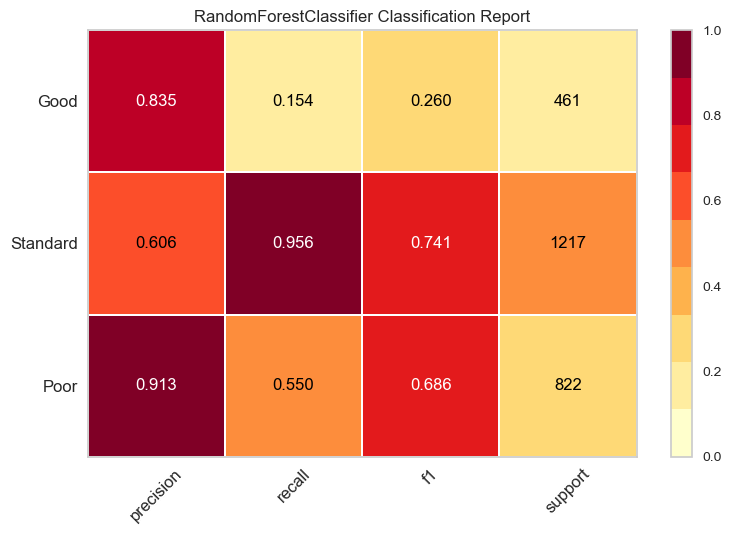

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [21]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

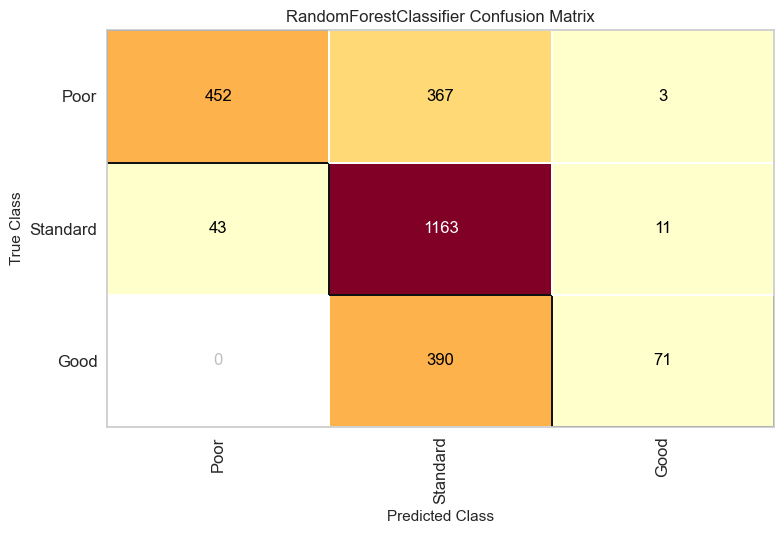

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [22]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

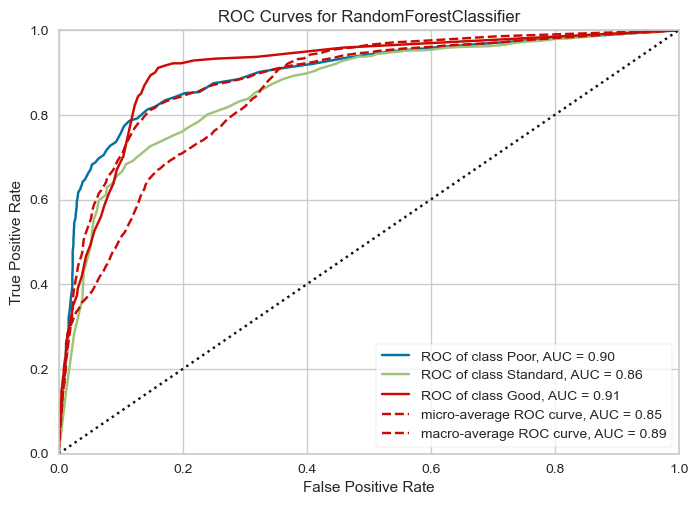

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [23]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 6. Oversample the Imbalanced Data with RandomOverSampler

In [24]:
X_train

,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
12301,CUS_0xcf0,Foot,21.125000,049-18-2146,Engineer,76019.68,6602.973333,9.0,6.000000,29,...,6.625,Bad,1743.81,37.343948,6.708333,Yes,390.588799,259.332003,Low_spent_Medium_value_payments,271.626531
11082,CUS_0xb57,Luciaa,18.285714,390-37-7471,Architect,63248.52,5074.710000,7.0,10.000000,16,...,10.000,Standard,2111.68,31.777023,10.458333,Yes,134.643484,294.309650,High_spent_Small_value_payments,352.247483
11554,CUS_0xbc1e,Lauren Taram,43.250000,006-09-6260,Entrepreneur,18137.25,1729.437500,7.0,6.000000,8,...,6.750,Standard,2234.83,34.820670,6.345238,Yes,72.058247,78.355737,High_spent_Medium_value_payments,275.755577
2356,CUS_0x3530,Edwardk,29.000000,738-74-7100,Journalist,43200.90,3807.075000,8.0,9.000000,16,...,8.875,Bad,1404.99,35.803311,11.597222,Yes,117.833840,141.696103,Low_spent_Medium_value_payments,383.677557
5065,CUS_0x5cc0,Victoria Bryans,17.125000,686-28-4038,Architect,34343.96,2897.996667,10.0,8.000000,28,...,12.000,Bad,1699.05,38.514016,11.428571,Yes,66.353460,127.210696,High_spent_Large_value_payments,363.816330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,CUS_0x85e7,Marc Jonesv,28.875000,959-37-3158,Doctor,102207.42,8534.285000,2.0,3.000000,7,...,2.000,Good,911.23,33.798397,23.625000,No,0.000000,398.359496,High_spent_Medium_value_payments,749.995869
718,CUS_0x1bef,Hopkinse,51.000000,160-43-6314,Doctor,121675.68,10085.640000,2.5,6.571429,3,...,1.000,Good,984.27,32.688504,16.000000,No,95.857347,291.691519,High_spent_Large_value_payments,872.265134
6327,CUS_0x6ed3,Anna Driverd,44.750000,416-26-7759,Developer,82402.34,7056.861667,2.0,7.000000,2,...,3.500,Good,733.56,34.549417,19.041667,No,146.796776,309.343354,High_spent_Medium_value_payments,508.296037
10002,CUS_0xa556,Jonathano,43.571429,304-18-9706,Media_Manager,39859.72,3102.643333,4.5,3.500000,1,...,3.000,Good,1281.92,32.958619,32.988095,No,21.156150,114.727728,High_spent_Medium_value_payments,430.630455


In [25]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [27]:
train_ros = pd.concat([X_train_ros, y_train_ros], axis=1)

(0.0, 5000.0)

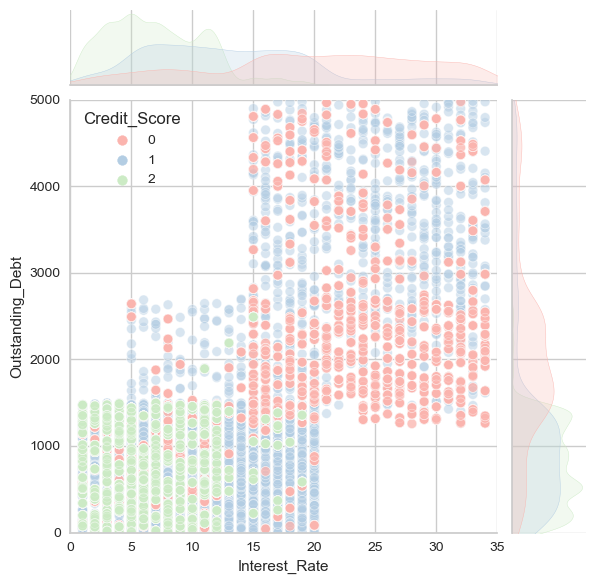

In [28]:
sns.jointplot(data=train_ros, x="Interest_Rate", y="Outstanding_Debt", hue="Credit_Score", alpha=0.5, palette="Pastel1")
plt.xlim(0,35)
plt.ylim(0,5000)

## 7. Train RandomForesfClassifier with the RandomOverSampler-oversampled Data

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier())]
model = Pipeline(steps)

In [31]:
model.fit(X_train_ros, y_train_ros)

Pipeline(steps=[('dtf',
                 <__main__.Data_Transformer object at 0x0000017EC99C5950>),
                ('rfc', RandomForestClassifier())])

In [32]:
y_test_pred = model.predict(X_test)

In [33]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.57      0.70       822
           1       0.62      0.94      0.75      1217
           2       0.75      0.21      0.33       461

    accuracy                           0.69      2500
   macro avg       0.76      0.57      0.59      2500
weighted avg       0.74      0.69      0.65      2500



In [34]:
confusion_matrix(y_test,y_test_pred)

array([[ 467,  349,    6],
       [  43, 1148,   26],
       [   1,  362,   98]], dtype=int64)

In [35]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

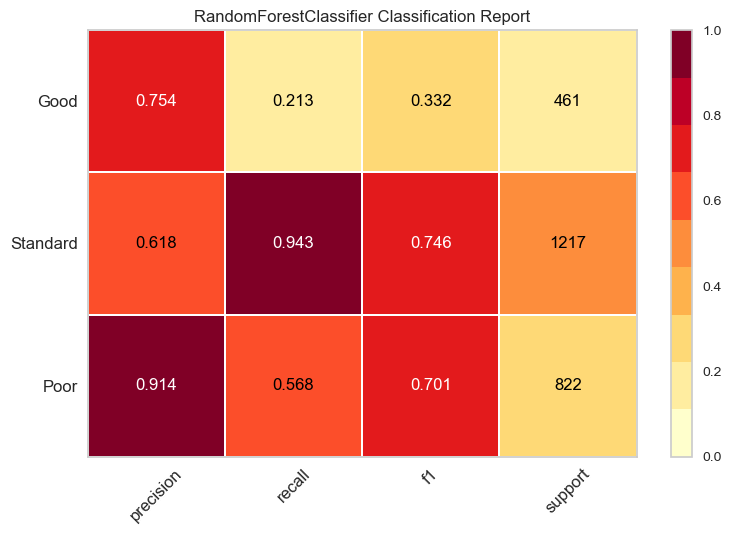

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [36]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

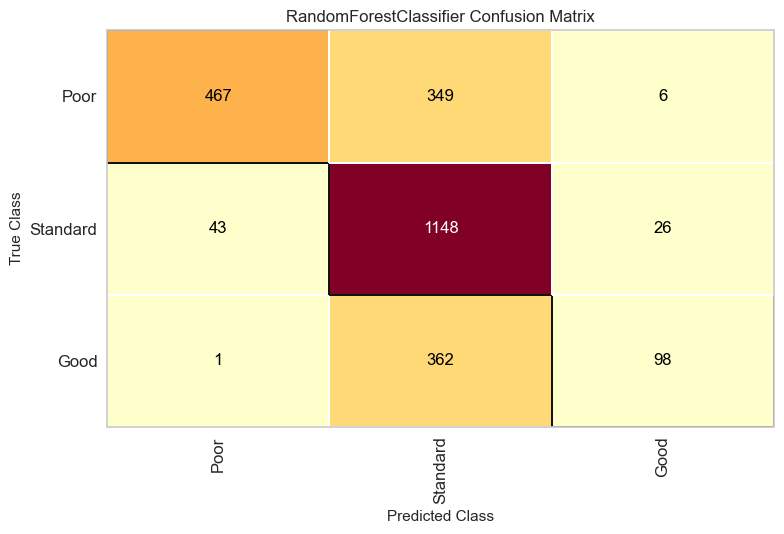

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [37]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

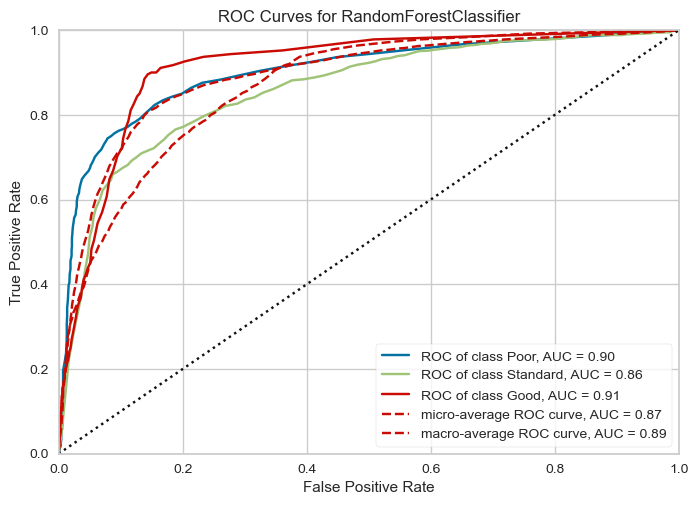

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [38]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 8. Oversample the Imbalanced Data with SMOTE

In [39]:
from imblearn.over_sampling import SMOTENC

In [40]:
smt = SMOTENC(categorical_features=[0,1,3,4,11,16,20,23])
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [41]:
train_smt = pd.concat([X_train_smt, y_train_smt], axis=1)

(0.0, 5000.0)

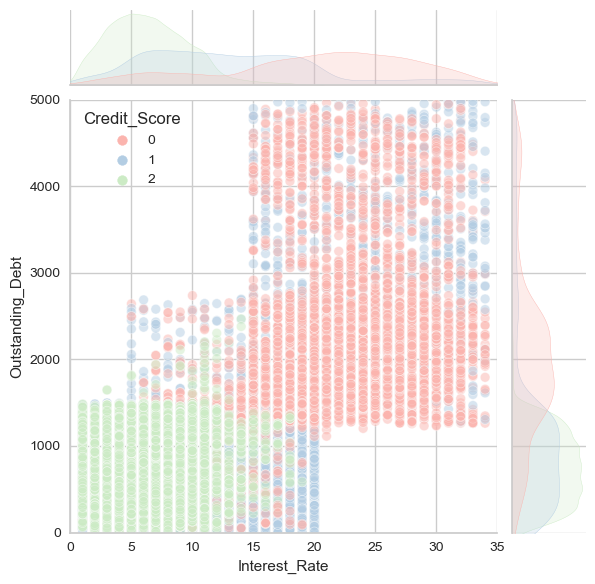

In [42]:
sns.jointplot(data=train_smt, x="Interest_Rate", y="Outstanding_Debt", hue="Credit_Score", alpha=0.5, palette="Pastel1")
plt.xlim(0,35)
plt.ylim(0,5000)

## 9. Train RandomForesfClassifier with the SMOTE-oversampled Data

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier())]
model = Pipeline(steps)

In [45]:
model.fit(X_train_smt, y_train_smt)

Pipeline(steps=[('dtf',
                 <__main__.Data_Transformer object at 0x0000017EC4518590>),
                ('rfc', RandomForestClassifier())])

In [46]:
y_test_pred = model.predict(X_test)

In [47]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.65      0.73       822
           1       0.68      0.86      0.76      1217
           2       0.66      0.46      0.54       461

    accuracy                           0.72      2500
   macro avg       0.73      0.66      0.68      2500
weighted avg       0.73      0.72      0.71      2500



In [48]:
confusion_matrix(y_test,y_test_pred)

array([[ 531,  258,   33],
       [  90, 1052,   75],
       [   4,  245,  212]], dtype=int64)

In [49]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

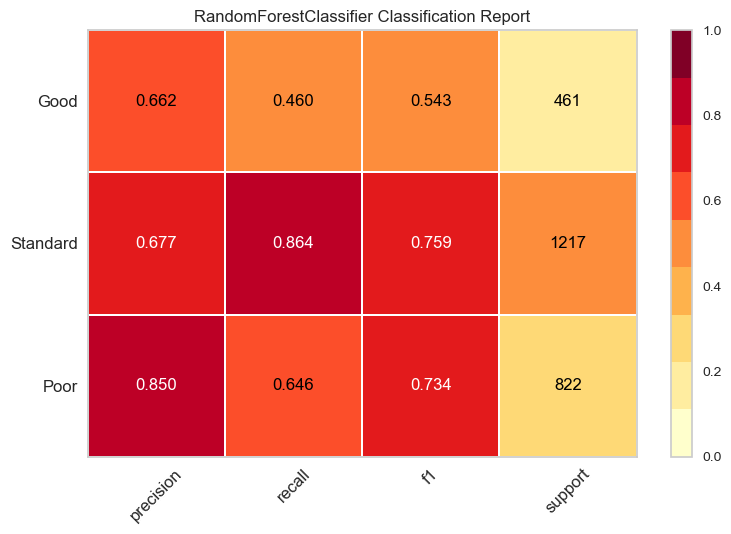

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [50]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

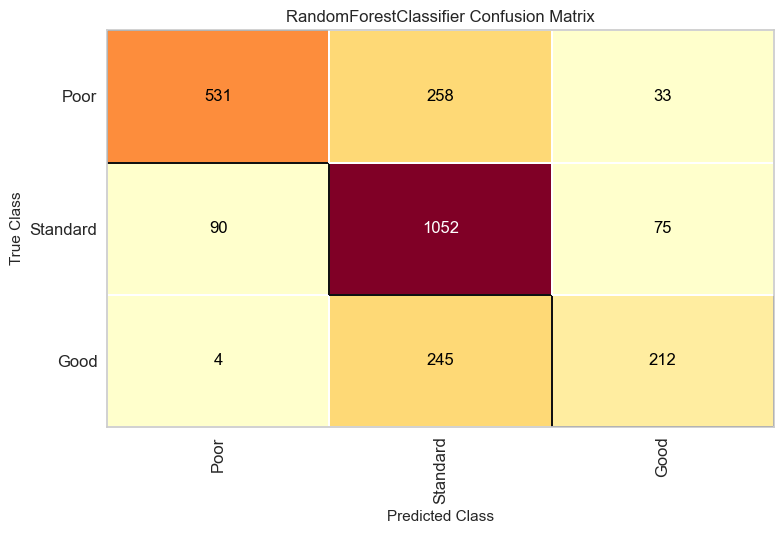

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [51]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

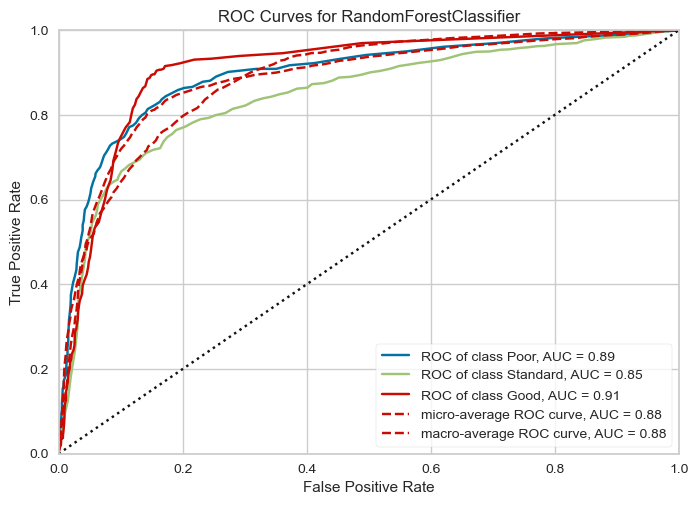

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [52]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 10. Oversample the Imbalanced Data with ADASYN

In [53]:
dtf = Data_Transformer()
X_train = dtf.fit_transform(X_train)
X_test = dtf.transform(X_test)

In [54]:
from imblearn.over_sampling import ADASYN

In [55]:
ada = ADASYN()
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

In [56]:
train_ada = pd.concat([X_train_ada, y_train_ada], axis=1)

(0.0, 5000.0)

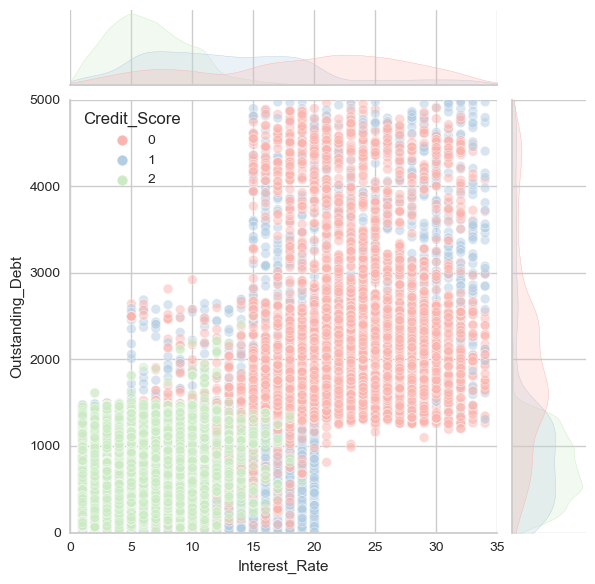

In [57]:
sns.jointplot(data=train_ada, x="Interest_Rate", y="Outstanding_Debt", hue="Credit_Score", alpha=0.5, palette="Pastel1")
plt.xlim(0,35)
plt.ylim(0,5000)

## 11. Train RandomForesfClassifier with the ADASYN-oversampled Data

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
model = RandomForestClassifier()

In [60]:
model.fit(X_train_ada, y_train_ada)

RandomForestClassifier()

In [61]:
y_test_pred = model.predict(X_test)

In [62]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.64      0.72       822
           1       0.67      0.86      0.75      1217
           2       0.68      0.46      0.55       461

    accuracy                           0.71      2500
   macro avg       0.73      0.65      0.67      2500
weighted avg       0.73      0.71      0.71      2500



In [63]:
confusion_matrix(y_test,y_test_pred)

array([[ 526,  271,   25],
       [  94, 1047,   76],
       [  11,  239,  211]], dtype=int64)

In [64]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


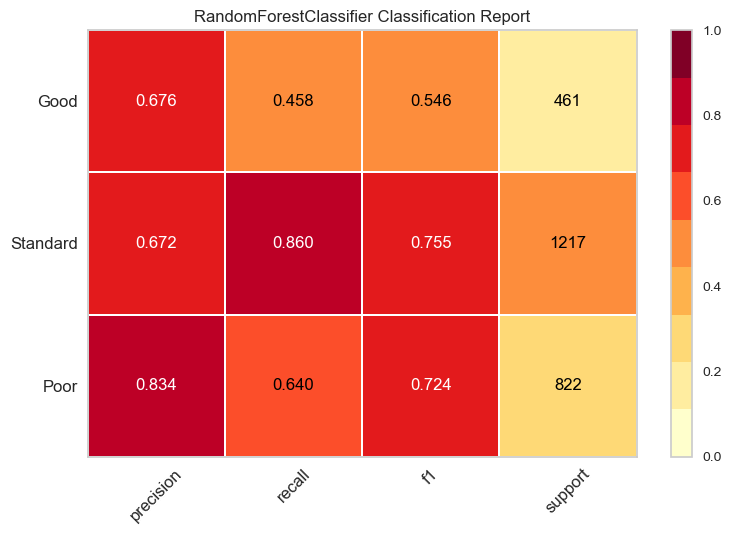

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [65]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


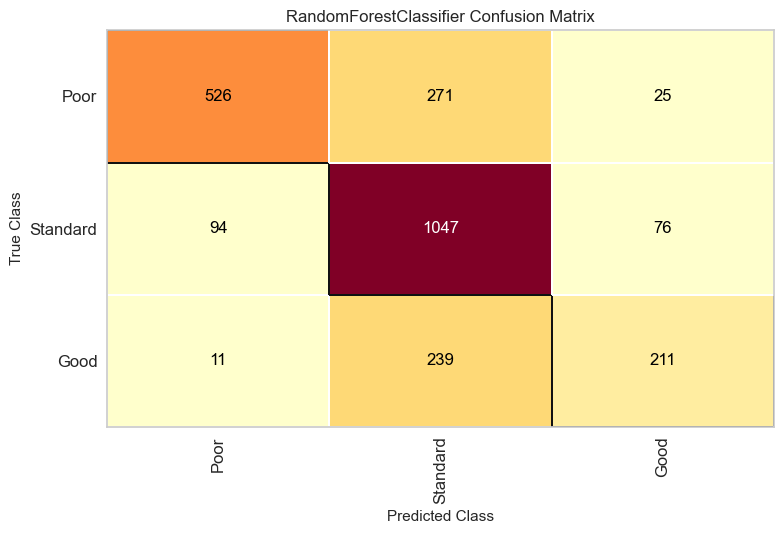

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [66]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


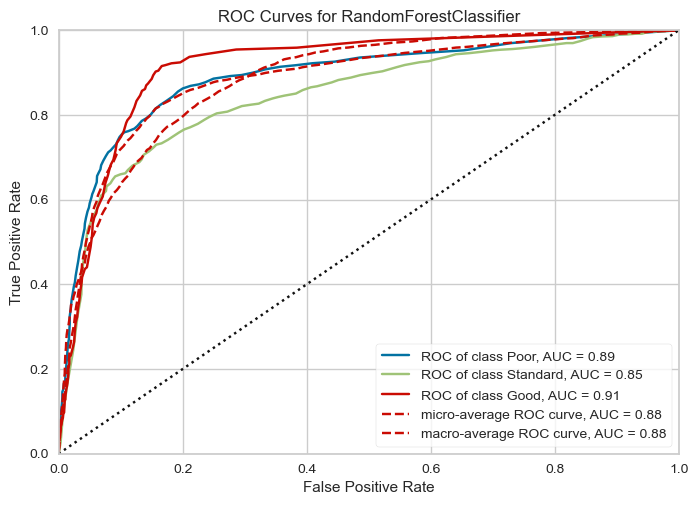

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [67]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()